<a href="https://colab.research.google.com/github/smrutisikha2001/EDA_Brazil_Forest_Fire/blob/main/Forest_Fires_in_Brazil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                   **EDA ON FOREST FIRES IN BRAZIL**

Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the CSV File

In [ ]:
data = pd.read_csv(r"/content/amazon.csv",encoding='iso-8859-1',parse_dates=['date'])

In [ ]:
data.dtypes

,0
year,int64
state,object
month,object
number,float64
date,datetime64[ns]


Displaying the Top 5 Rows of The Dataset

In [ ]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


Displaying the Last 5 Rows of The Dataset

In [ ]:
data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


 Shape of Our Dataset (Number of Rows And Number of Columns)

In [ ]:
data.shape

(6454, 5)

In [ ]:
print('Number of rows: ', data.shape[0])
print('Number of columns: ', data.shape[1])

Number of rows:  6454
Number of columns:  5


Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


Checking For Duplicate Data and Dropping Them

In [ ]:
data.duplicated().any()

np.True_

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().any()

np.False_

Checking for Null Values In The Dataset

In [ ]:
data.isnull().sum()

,0
year,0
state,0
month,0
number,0
date,0


Cheching the overall statistics of the Dataset

In [ ]:
data.describe(include='all')

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Setembro,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


Renaming the  Month Names To English

In [ ]:
data['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [ ]:
data['eng_month_name'] = data['month'].map({'Janeiro': 'Jan',
                                            'Fevereiro': 'Feb',
                                            'Março': 'March',
                                            'Abril': 'April',
                                            'Maio': 'May',
                                            'Junho' : 'June',
                                            'Julho' : 'July',
                                            'Agosto' : 'August',
                                            'Setembro': 'September',
                                            'Outubro': 'October',
                                            'Novembro' : 'November',
                                            'Dezembro': 'December'})

In [ ]:
data.head(1)

,year,state,month,number,date,eng_month_name
0,1998,Acre,Janeiro,0.0,1998-01-01,Jan


Total Number of Fires Registered

In [ ]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'eng_month_name'], dtype='object')

In [ ]:
# pd.set_option('display.max_rows', None)
# data
# pd.reset_option('display.max_rows')

In [ ]:
data['number'].sum()

np.float64(698811.073)

In Which Month Maximum Number of Forest Fires Were Reported?


In [ ]:
data1 = data.groupby('eng_month_name')['number'].sum().reset_index()
data1

,eng_month_name,number
0,April,28184.770
1,August,88050.435
2,December,57535.480
3,Feb,30839.050
4,Jan,47681.844
5,July,92319.113
6,June,55997.675
7,March,30709.405
8,May,34725.363
9,November,85508.054


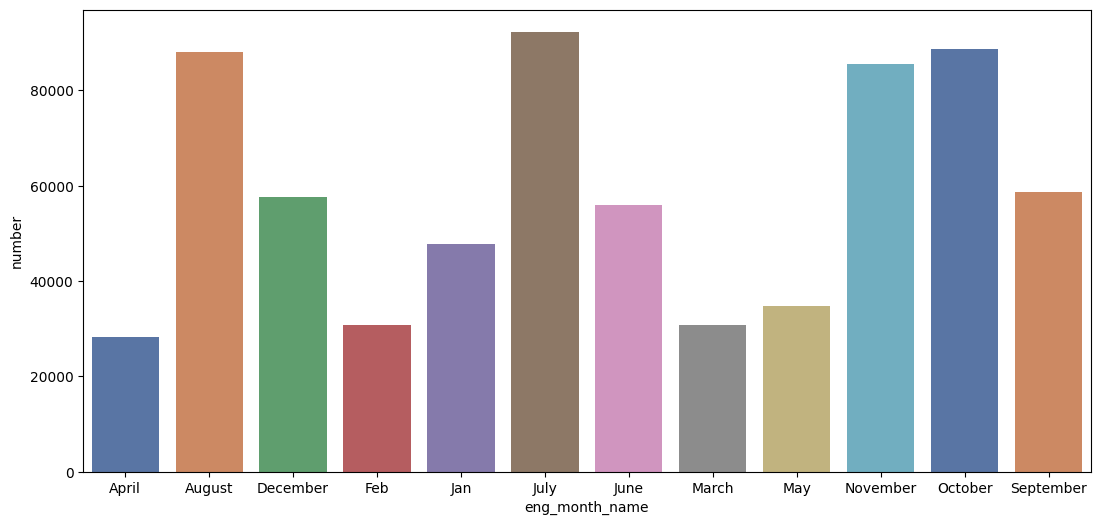

In [ ]:
plt.figure(figsize=(13,6))
sns.barplot(x='eng_month_name', y='number',data=data1,hue = 'eng_month_name',palette='deep')
plt.show()

In Which Year Maximum Number of Forest Fires Was Reported?

In [ ]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'eng_month_name'], dtype='object')

In [ ]:
data2 = data.groupby('year')['number'].sum().reset_index()
data2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<ipython-input-75-15d20dc9abf1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='number',data=data2, palette='deep')


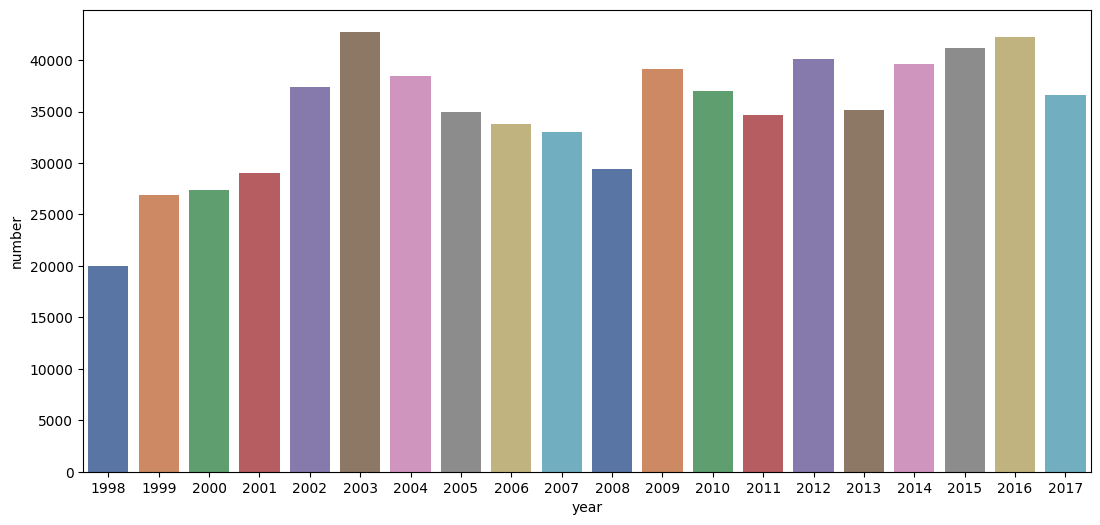

In [ ]:
plt.figure(figsize=(13,6))
sns.barplot(x='year', y='number',data=data2, palette='deep')
plt.show()

 In Which State Maximum Number of Forest Fires Was Reported?

In [ ]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'eng_month_name'], dtype='object')

In [ ]:
data3 = data.groupby('state')['number'].sum().reset_index()

<ipython-input-95-4e9991281caa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='number',data=data3, palette='deep')


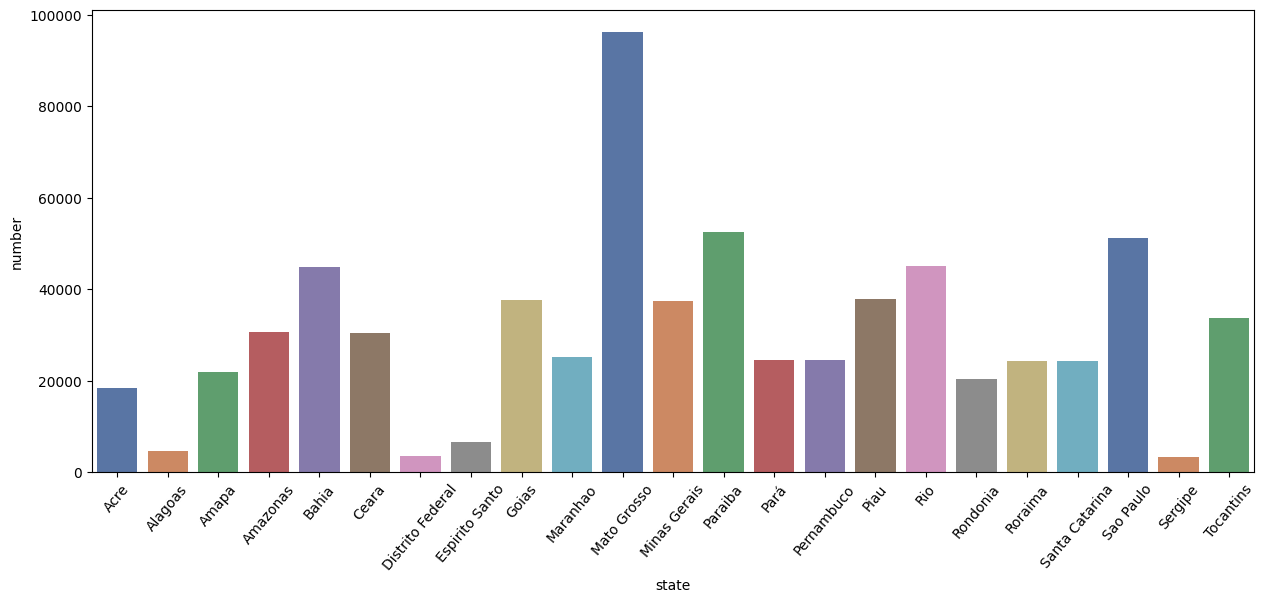

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x='state', y='number',data=data3, palette='deep')
plt.xticks(rotation=50)
plt.show()

Find Total Number of Fires Were Reported In Amazonas

In [ ]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'eng_month_name'], dtype='object')

In [ ]:
data[data['state']== 'Amazonas']['number'].sum()

np.float64(30650.129)

Display Number of Fires Were Reported In Amazonas (Year-Wise)

In [ ]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'eng_month_name'], dtype='object')

In [ ]:
data4 = data[data['state']=='Amazonas']
data5 = data4.groupby('year')['number'].sum().reset_index()

<ipython-input-103-3ebb44d7fcdf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='number',data=data5, palette='deep')


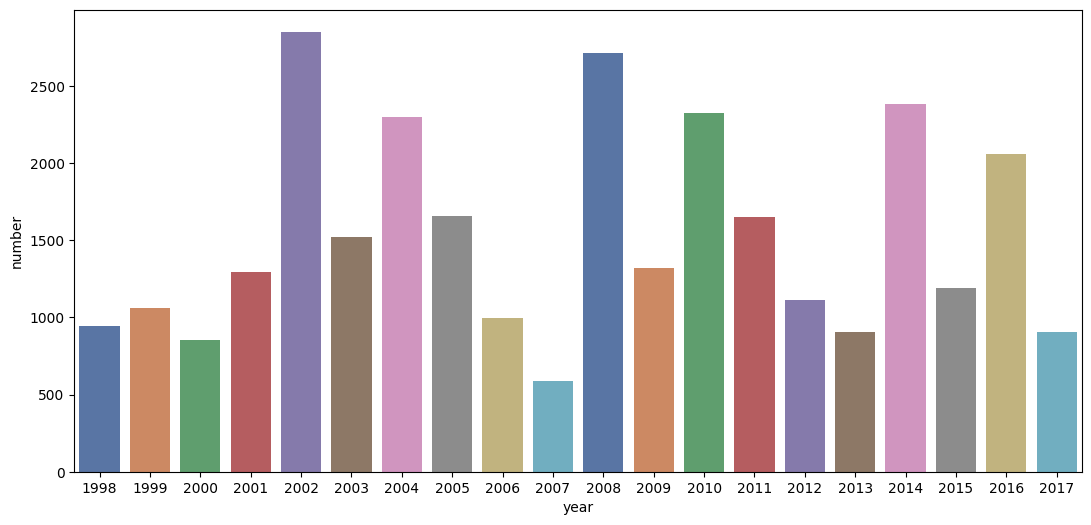

In [ ]:
plt.figure(figsize=(13,6))
sns.barplot(x='year', y='number',data=data5, palette='deep')
plt.show()

 Display Number of Fires Were Reported In Amazonas (Day-Wise)

In [ ]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'eng_month_name'], dtype='object')

In [ ]:
data6 = data[data['state']=='Amazonas']
day = data6.groupby(data['date'].dt.dayofweek)['number'].sum()

import calendar

day.index = day.index.map(lambda x: calendar.day_name[x])
day = day.reset_index()
day

,date,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


<ipython-input-117-2bc7ce83de5f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='date', y = 'number', data=day, palette='deep')


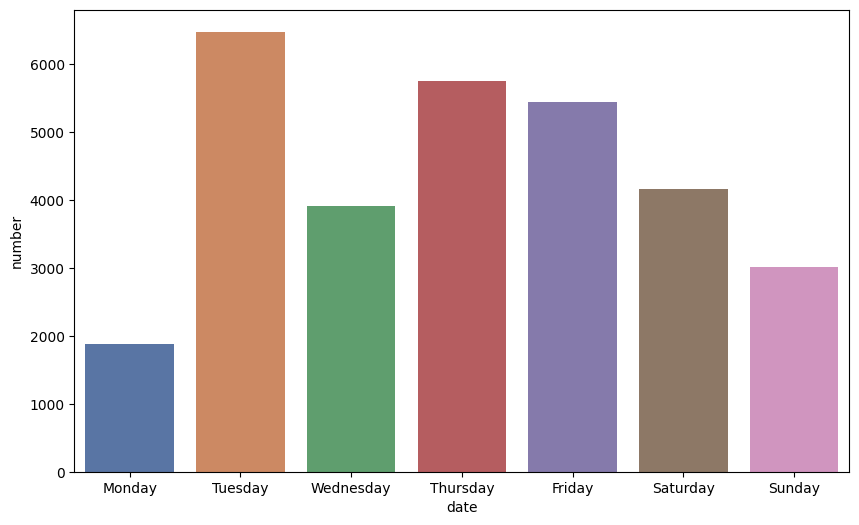

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='date', y = 'number', data=day, palette='deep')
plt.show()

Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’

In [ ]:
data7 = data[data['year']==2015]
data8 = data7.groupby('eng_month_name')['number'].sum().reset_index()

In [ ]:
data8

,eng_month_name,number
0,April,2573.000
1,August,4363.125
2,December,4088.522
3,Feb,2309.000
4,Jan,4635.000
5,July,4364.392
6,June,3260.552
7,March,2202.000
8,May,2384.000
9,November,4034.518


<ipython-input-124-912da34dc554>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='eng_month_name', y = 'number', data=data8, palette='deep')


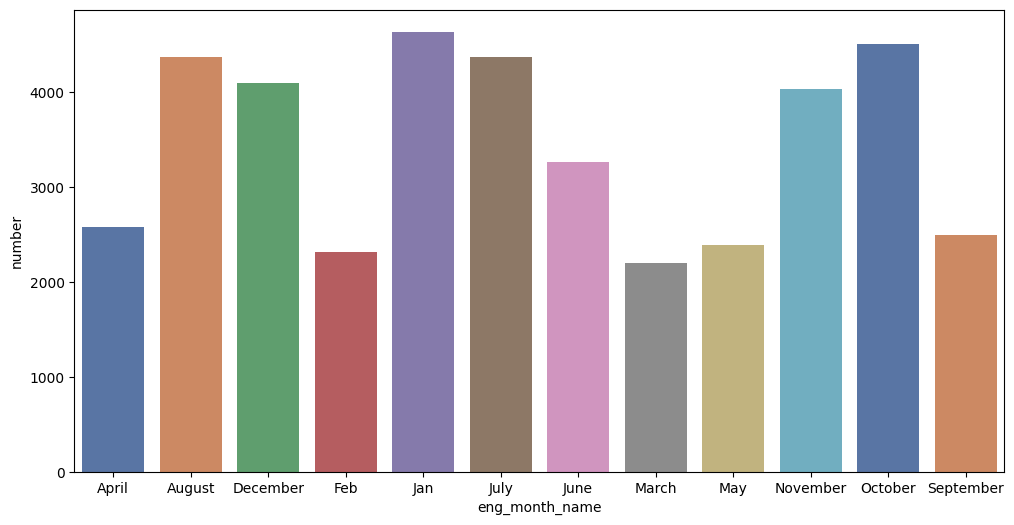

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='eng_month_name', y = 'number', data=data8, palette='deep')
plt.show()

Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)

In [ ]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'eng_month_name'], dtype='object')

In [ ]:
avg_statewise_report = data.groupby('state')['number'].mean().sort_values(ascending=False)
avg_statewise_report = avg_statewise_report.reset_index()

<ipython-input-130-e57624ce2cde>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='number', data=avg_statewise_report, palette='deep')


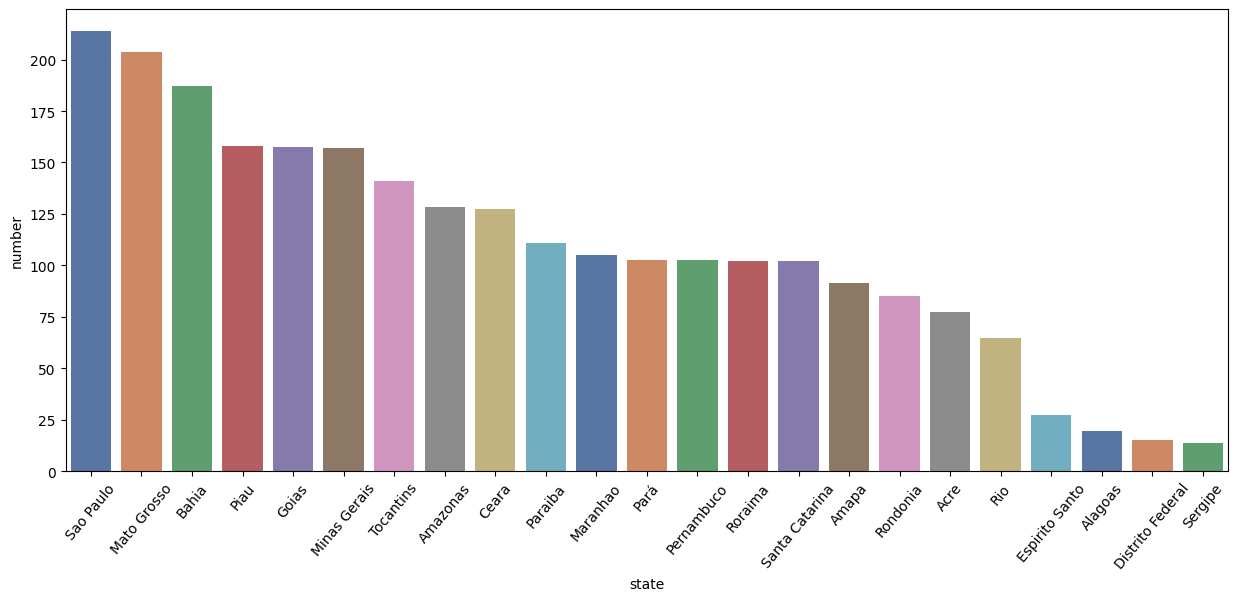

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x='state', y='number', data=avg_statewise_report, palette='deep')
plt.xticks(rotation=50)
plt.show()

To Find The State Names Where Fires Were Reported In 'dec' Month

In [ ]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'eng_month_name'], dtype='object')

In [ ]:
dec_data = data[data['eng_month_name'] == 'December']
dec_data
dec_data[dec_data['number']>0.0]['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)